In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
import matplotlib.patches as patches

In [2]:
%matplotlib notebook

In [3]:
# Simulation space dimensions, etc. 
nx = 101
ny = 103
nz = 105
xmax,ymax,zmax = 1000.0, 1000.0, 1000.0 #micrometers

x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print('dx', dx)
y = np.linspace(0,ymax,ny); dy = y[1]-y[0]; print('dy',dy)
z = np.linspace(0,zmax,nz); dz = z[1]-z[0]; print('dz',dz)
nxmid = int(nx/2); print('nxmid =', nxmid); print('x(nxmid) =',x[nxmid])
nymid = int(ny/2)
nzmid = int(nz/2)
x = x-x[nxmid]
y = y-y[nymid]
z = z-z[nzmid]

# Define the box inside
Ldesiredx = 30. # Doesn't always work out to this because the grid is discretized
boxradx = int(Ldesiredx/dx)
Lx = boxradx*dx; print('Lx =', Lx)

Ldesiredy = 40.
boxrady = int(Ldesiredy/dy)
Ly = boxrady*dy; print('Ly =', Ly)

Ldesiredz = 50.
boxradz = int(Ldesiredz/dz)
Lz = boxradz*dz; print('Lz =', Lz)

ixboxmin = nxmid-boxradx; print(ixboxmin)
ixboxmax = nxmid+boxradx; print(ixboxmax)
iyboxmin = nymid-boxrady
iyboxmax = nymid+boxrady
izboxmin = nzmid-boxradz
izboxmax = nzmid+boxradz

# Setting up to slice through the volume
ixboxold = [ix for ix in range(ixboxmin,ixboxmax)]; print('Old method (list):', ixboxold)
ixbox = slice(ixboxmin,ixboxmax); print('New method (slice):', ixbox)
print('testing ...', x[ixboxold])
print('testing ...', x[ixbox])

iyboxold = [iy for iy in range(iyboxmin,iyboxmax)]; #print(iyboxold)
iybox = slice(iyboxmin,iyboxmax); #print(iybox)

izboxold = [iz for iz in range(izboxmin,izboxmax)]; #print(izboxold)
izbox = slice(izboxmin,izboxmax); #print(izbox)

xboxp = x[ixbox] - np.mean(x[ixbox])
yboxp = y[iybox] - np.mean(y[iybox])
zboxp = z[izbox] - np.mean(z[izbox])

xp = x - np.mean(x[ixbox])
yp = y - np.mean(y[iybox])
zp = z - np.mean(z[izbox]) 

dx 10.0
dy 9.803921568627452
dz 9.615384615384615
nxmid = 50
x(nxmid) = 500.0
Lx = 30.0
Ly = 39.21568627450981
Lz = 48.07692307692307
47
53
Old method (list): [47, 48, 49, 50, 51, 52]
New method (slice): slice(47, 53, None)
testing ... [-30. -20. -10.   0.  10.  20.]
testing ... [-30. -20. -10.   0.  10.  20.]


In [4]:
# Compute the diffusion coefficient at this temperature
D_SI_300 = 24.0e-6 # m^2/s
D_300 = D_SI_300 * 1e6  # um^2/us
Temp = 260.0
Pressure = .2
acoef = 2.072
D = D_300*(Temp/300)**acoef/(Pressure/1.0); print(D_300, D)

# Here's the part that involved some guesswork ... getting the Neumann coefficient
gneumann_nu_kin = D/(nx-1); print('gneumann_kin=', gneumann_nu_kin)
nu_kin_ml = 0.1633333333
kfactor = gneumann_nu_kin/nu_kin_ml; print('kfactor=', kfactor)
gneumann = kfactor * nu_kin_ml; print('gneumann=', gneumann)

# This is the far-field boundary
alphasigma = .36; print('alpha*sigma (and udirichlet)=', alphasigma)
udirichlet = alphasigma

24.0 89.20943386022752
gneumann_kin= 0.8920943386022752
kfactor= 5.461802074189808
gneumann= 0.8920943386022752
alpha*sigma (and udirichlet)= 0.36


In [5]:
# Aesthetics ... fills in the box with an arbitrary constant value
def fillinold(un,ixbox,iybox,izbox,overrideflag=0,overrideval=0):
    print('incoming un shape=',np.shape(un))
    border = cp(un[ixbox[0]-1,iybox[0],izbox[0]])
    if(overrideflag == 1):
        border = overrideval
    for ix in ixbox:        
        for iy in iybox:
            for iz in izbox:
                un[ix,iy,iz] = border
    return un

# Aesthetics ... fills in the box with an arbitrary constant value
def fillin(un,ixbox,iybox,izbox,overrideflag=0,overrideval=0):
    border = cp(un[ixbox.start-1,iybox.start,izbox.start])
    if(overrideflag == 1):
        border = overrideval
    un[ixbox,iybox,izbox] = border
    return un

In [6]:
# Initialize u0 and un as udirichlet
u0 = np.ones([nx, ny, nz])*udirichlet # old u values
u0 = fillinold(u0, ixboxold, iyboxold, izboxold, overrideflag=1, overrideval=0)
print(u0[:,nxmid,nymid])

u0 = np.ones([nx, ny, nz])*udirichlet # old u values
u0 = fillin(u0, ixbox, iybox, izbox, overrideflag=1, overrideval=0)
print(u0[:,nxmid,nymid])

incoming un shape= (101, 103, 105)
[0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.   0.   0.   0.   0.   0.   0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36]
[0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.   0.   0.   0.   0.   0.   0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36

In [7]:
# Physical parameters translated into values for computation
dx2 = dx**2
dy2 = dy**2
dz2 = dz**2
# dt = (dx2+dy2+dz2)/D/10; print('dt=',dt)
dt = (dx2+dy2+dz2)/D/100; print('dt=',dt)
Dxeff = D*dt/dx2; print('Dxeff=',Dxeff)
Dyeff = D*dt/dy2
Dzeff = D*dt/dz2
gneumanneffx = gneumann*dt/dx**2; print('gneumann effective (x)', gneumanneffx)
gneumanneffy = gneumann*dt/dy**2; print('gneumann effective (y)', gneumanneffy)
gneumanneffz = gneumann*dt/dz**2; print('gneumann effective (z)', gneumanneffz)

# The differential equation solver
def propagate(u0_orig,ixbox,iybox,izbox,gneumanneffx,gneumanneffy,gneumanneffz,Dxeff,Dyeff,Dzeff):
    
    # Diffusion
    u0 = cp(u0_orig)
    un = np.zeros(np.shape(u0))
    un[1:-1, 1:-1, 1:-1] = u0[1:-1, 1:-1, 1:-1] + ( \
    (u0[2:, 1:-1, 1:-1] - 2*u0[1:-1, 1:-1, 1:-1] + u0[:-2, 1:-1, 1:-1])*Dxeff + \
    (u0[1:-1, 2:, 1:-1] - 2*u0[1:-1, 1:-1, 1:-1] + u0[1:-1, :-2, 1:-1])*Dyeff + \
    (u0[1:-1, 1:-1, 2:] - 2*u0[1:-1, 1:-1, 1:-1] + u0[1:-1,1:-1,  :-2])*Dzeff )

    # Dirichlet outer boundary
    un[[0,-1],:,:]=udirichlet
    un[:,[0,-1],:]=udirichlet
    un[:,:,[0,-1]]=udirichlet
    
    # Pull out the stop and start indices
    ixmin = ixbox.start
    ixmax = ixbox.stop-1
    iymin = iybox.start
    iymax = iybox.stop-1
    izmin = izbox.start
    izmax = izbox.stop-1
    
    # Neumann inner boundary
    un[ixmin-1,iybox,izbox] = u0[ixmin-1,iybox,izbox] +(u0[ixmin-2,iybox,izbox] - u0[ixmin-1,iybox,izbox])*Dxeff -gneumanneffx
    un[ixmax+1,iybox,izbox] = u0[ixmax+1,iybox,izbox] +(u0[ixmax+2,iybox,izbox] - u0[ixmax+1,iybox,izbox])*Dxeff -gneumanneffx

    un[ixbox,iymin-1,izbox] = u0[ixbox,iymin-1,izbox] +(u0[ixbox,iymin-2,izbox] - u0[ixbox,iymin-1,izbox])*Dyeff -gneumanneffy
    un[ixbox,iymax+1,izbox] = u0[ixbox,iymax+1,izbox] +(u0[ixbox,iymax+2,izbox] - u0[ixbox,iymax+1,izbox])*Dyeff -gneumanneffy

    un[ixbox,iybox,izmin-1] = u0[ixbox,iybox,izmin-1] +(u0[ixbox,iybox,izmin-2] - u0[ixbox,iybox,izmin-1])*Dzeff -gneumanneffz
    un[ixbox,iybox,izmax+1] = u0[ixbox,iybox,izmax+1] +(u0[ixbox,iybox,izmax+2] - u0[ixbox,iybox,izmax+1])*Dzeff -gneumanneffz
    
    # Also zero-out inside the box (this is just aesthetic)
    un = fillin(un,ixbox, iybox, izbox, overrideflag=1, overrideval=0)
    
    return un

dt= 0.03234775594223659
Dxeff= 0.02885724994255737
gneumann effective (x) 0.0002885724994255737
gneumann effective (y) 0.00030023082840236685
gneumann effective (z) 0.0003121200153787005


In [8]:
# Initialize the state of the vapor field
un = cp(u0)
unlist = []
timelist = []
keepevery = 1000

In [9]:
# Propagate forward a bunch of times
ntimes = 30000
for i in range(ntimes):
    if np.mod(i,keepevery) == 0:
        print('Storing ', i, ' of ', ntimes)
        unlist.append(un)
        timelist.append(i*dt)
    un = propagate(un,ixbox,iybox,izbox,gneumanneffx,gneumanneffy,gneumanneffz,Dxeff,Dyeff,Dzeff)

Storing  0  of  30000
Storing  1000  of  30000
Storing  2000  of  30000
Storing  3000  of  30000
Storing  4000  of  30000
Storing  5000  of  30000
Storing  6000  of  30000
Storing  7000  of  30000
Storing  8000  of  30000
Storing  9000  of  30000
Storing  10000  of  30000
Storing  11000  of  30000
Storing  12000  of  30000
Storing  13000  of  30000
Storing  14000  of  30000
Storing  15000  of  30000
Storing  16000  of  30000
Storing  17000  of  30000
Storing  18000  of  30000
Storing  19000  of  30000
Storing  20000  of  30000
Storing  21000  of  30000
Storing  22000  of  30000
Storing  23000  of  30000
Storing  24000  of  30000
Storing  25000  of  30000
Storing  26000  of  30000
Storing  27000  of  30000
Storing  28000  of  30000
Storing  29000  of  30000


<IPython.core.display.Javascript object>


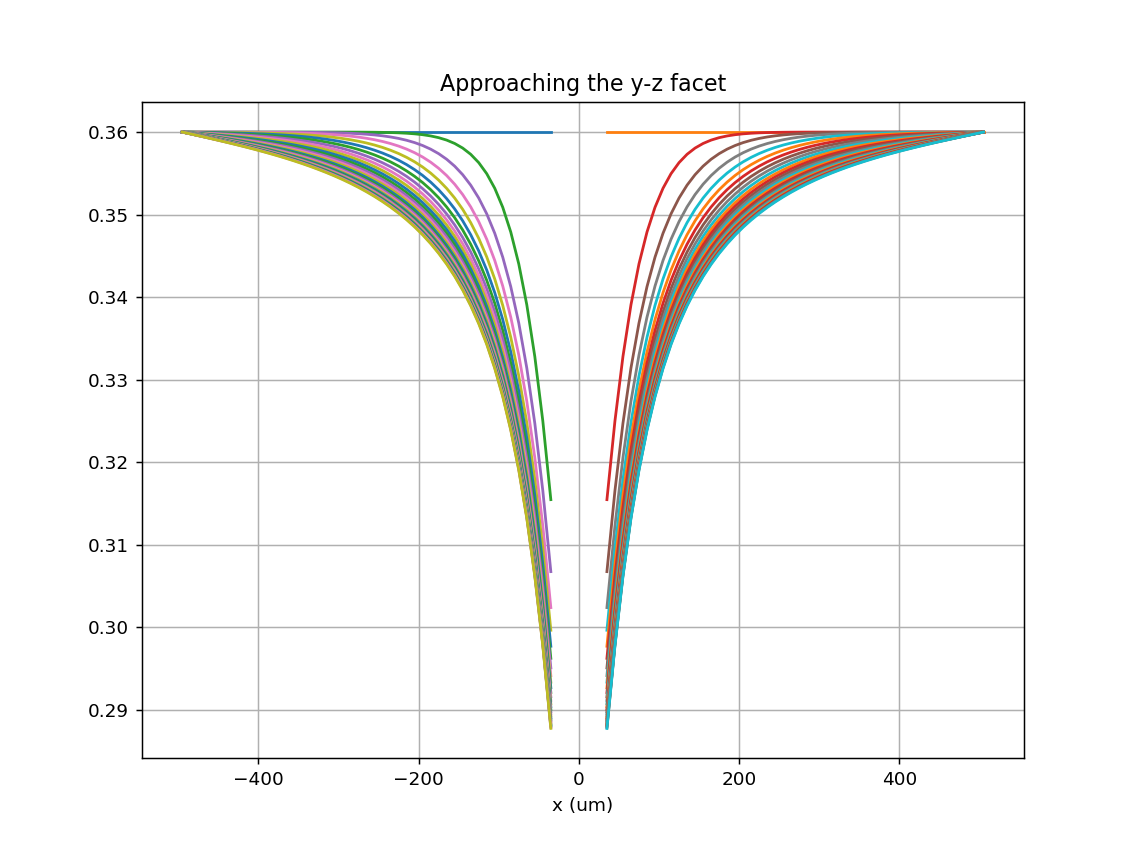

In [10]:
# Plotting from far afield up to y-z facet
ixbox_pre = slice(0,ixboxmin)
ixbox_post = slice(ixboxmax,nx)
unxsurfacelist = []
plt.figure()
for j in range(len(timelist)):
    un = unlist[j]
    plt.plot(xp[ixbox_pre], un[ixbox_pre,nymid,nzmid])
    plt.plot(xp[ixbox_post],un[ixbox_post,nymid,nzmid])
    unxsurfacelist.append(unlist[j][ixbox_post,nymid,nzmid][0])
plt.xlabel('x (um)')
plt.title('Approaching the y-z facet')
plt.grid(True)

<IPython.core.display.Javascript object>


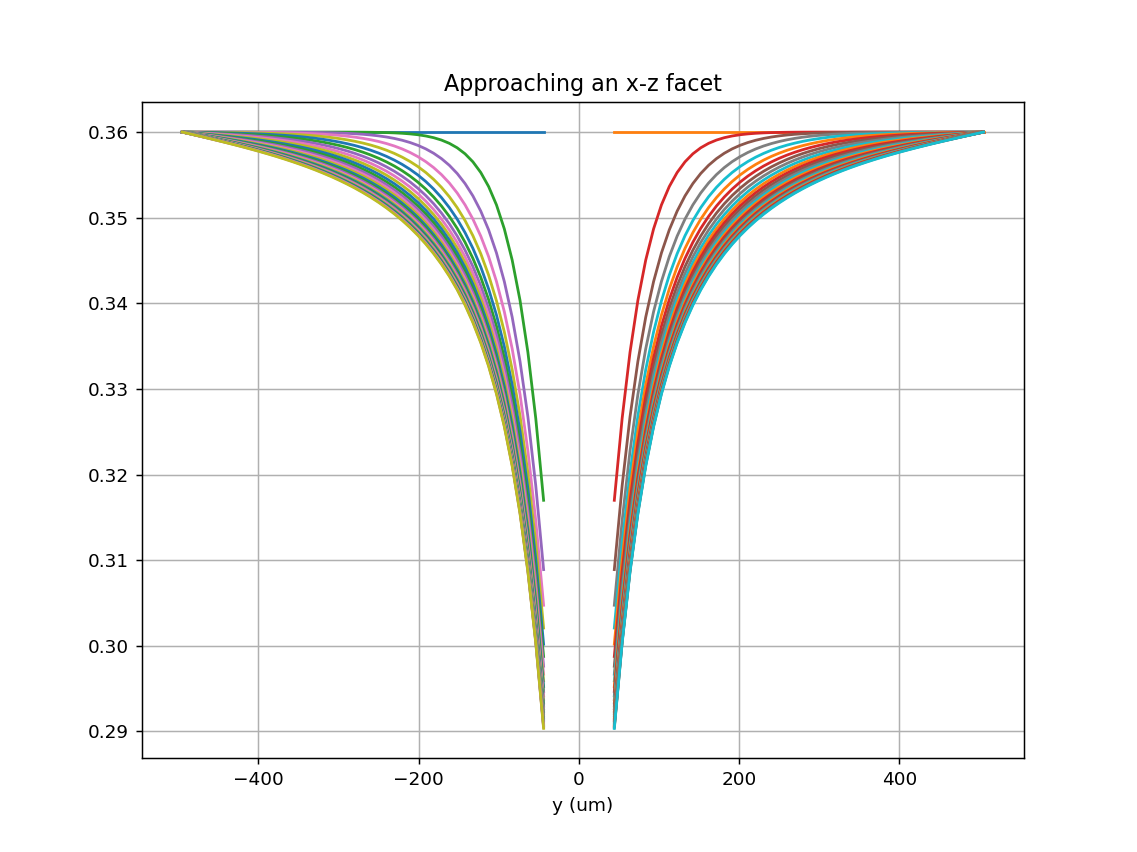

In [11]:
# Plotting from far afield up to an x-z facet
iybox_pre = slice(0,iyboxmin)
iybox_post = slice(iyboxmax,ny)
unysurfacelist = []
plt.figure()
for j in range(len(timelist)):
    un = unlist[j]
    plt.plot(yp[iybox_pre], un[nxmid,iybox_pre,nzmid])
    plt.plot(yp[iybox_post],un[nxmid,iybox_post,nzmid])
    unysurfacelist.append(unlist[j][nxmid,iybox_post,nzmid][0])
plt.xlabel('y (um)')
plt.title('Approaching an x-z facet')
plt.grid(True)

<IPython.core.display.Javascript object>


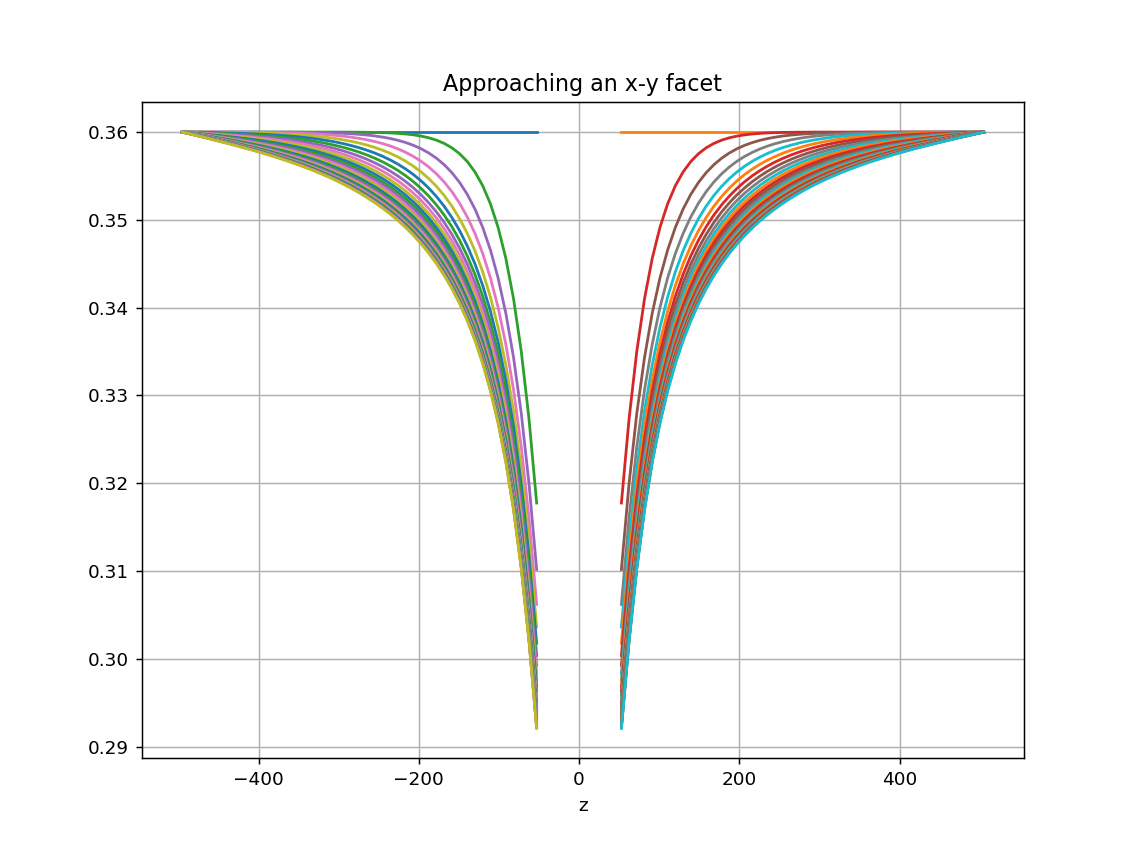

In [12]:
# Plotting from far afield up to an x-y facet
izbox_pre = slice(0,izboxmin)
izbox_post = slice(izboxmax,nz)
unzsurfacelist = []
plt.figure()
for j in range(len(timelist)):
    un = unlist[j]
    plt.plot(zp[izbox_pre], un[nxmid,nymid,izbox_pre])
    plt.plot(zp[izbox_post],un[nxmid,nymid,izbox_post])
    unzsurfacelist.append(unlist[j][nxmid,nymid,izbox_post][0])
plt.xlabel('z')
plt.title('Approaching an x-y facet')
plt.grid(True)

<IPython.core.display.Javascript object>


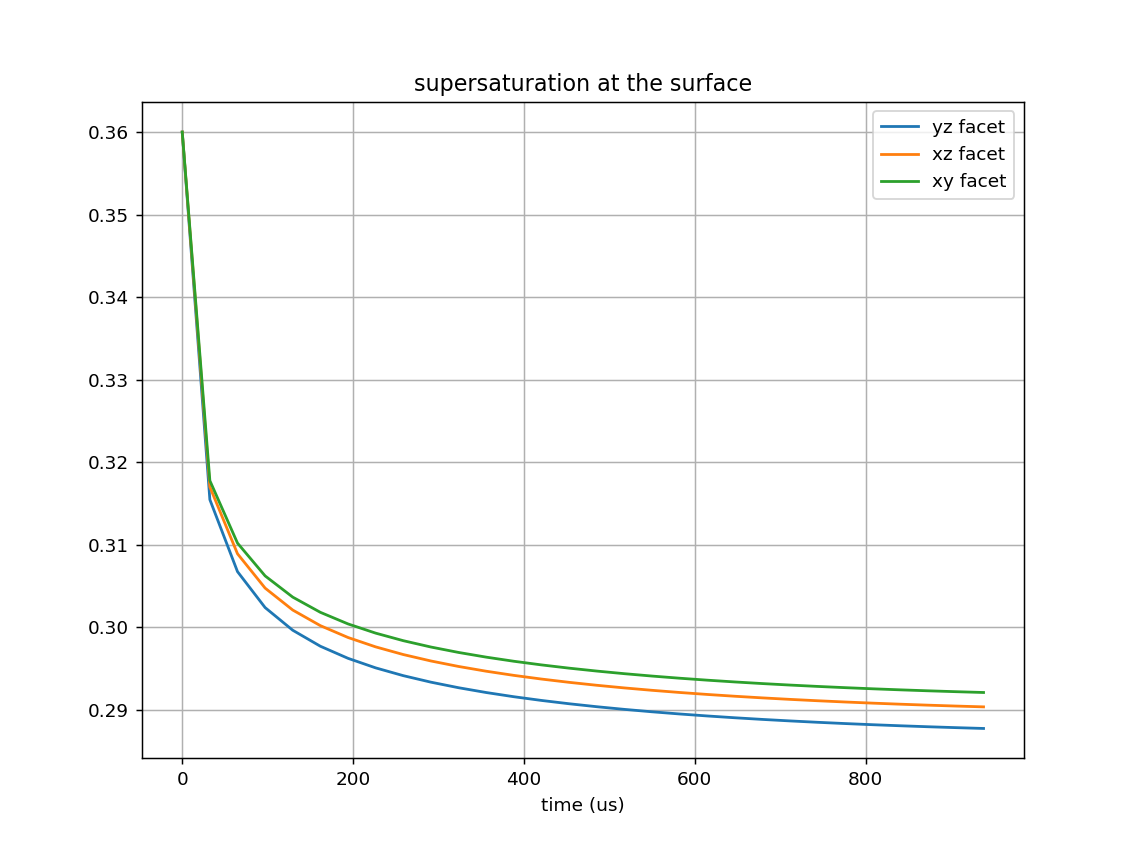

In [13]:
# Plotting supersaturation at the surface over time
plt.figure()
plt.plot(timelist,unxsurfacelist,label='yz facet')
plt.plot(timelist,unysurfacelist,label='xz facet')
plt.plot(timelist,unzsurfacelist,label='xy facet')
plt.xlabel('time (us)')
plt.title('supersaturation at the surface')
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


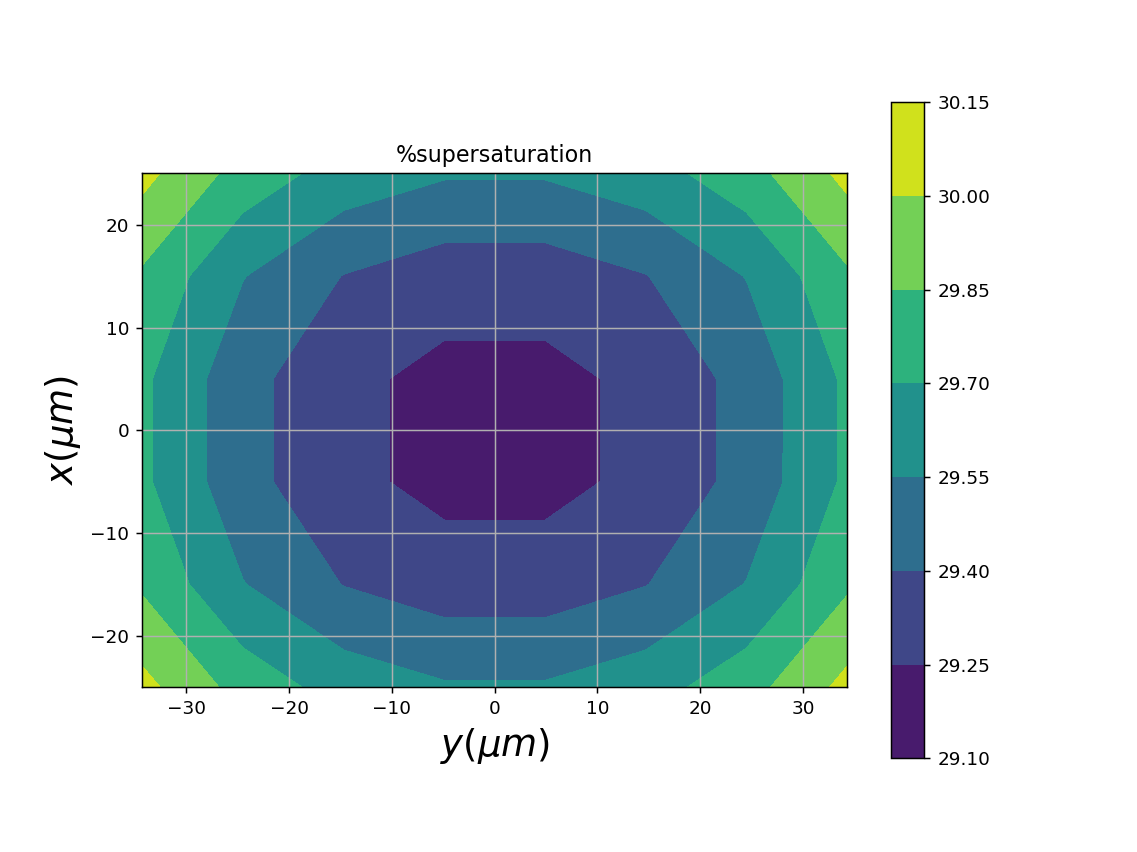

Text(0.5, 1.0, '%supersaturation')

In [14]:
# Graph y-x plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contourf(yboxp,xboxp,un[ixbox,iybox,izboxmax]*100)
ax.set_xlabel(r'$y (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.gca().set_aspect('equal')
plt.grid(True)
fig.colorbar(CS)
plt.title('%supersaturation')

<IPython.core.display.Javascript object>


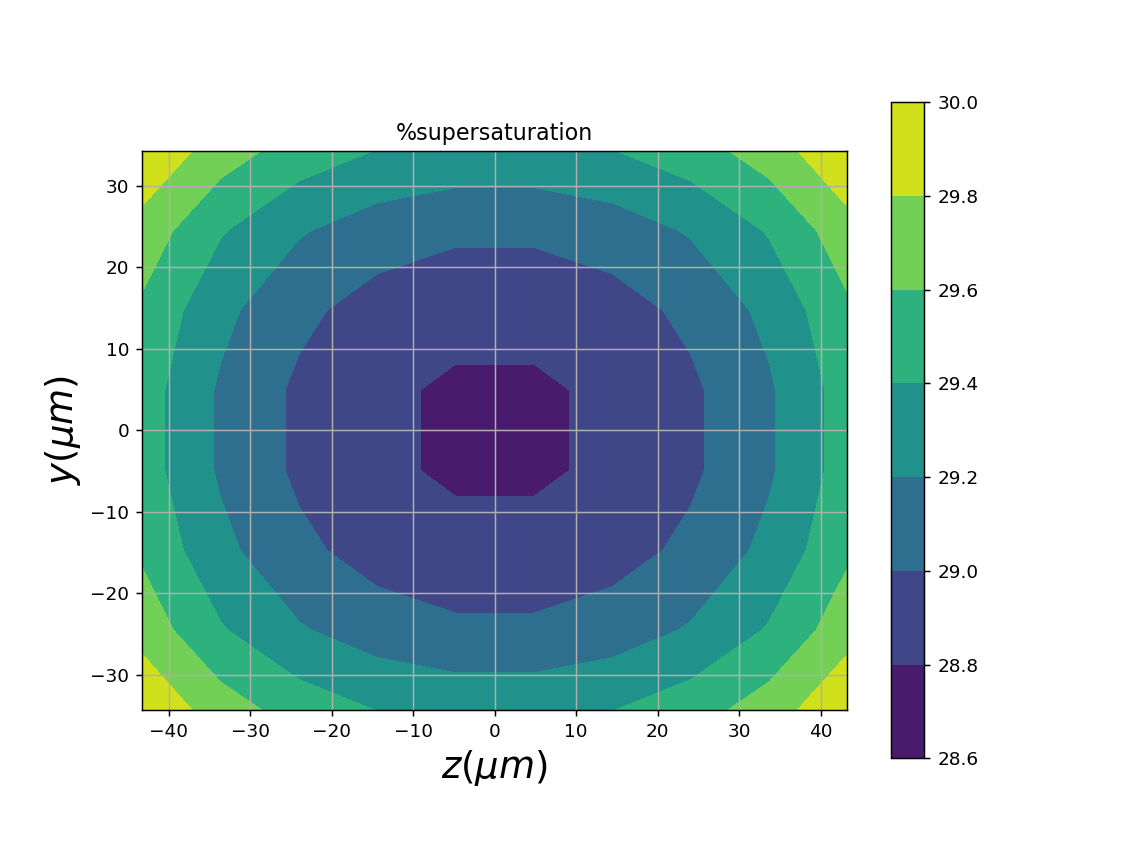

Text(0.5, 1.0, '%supersaturation')

In [15]:
# Graph z-y plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,yboxp,un[ixboxmax,iybox,izbox]*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$y (\mu m)$', fontsize=20)
plt.gca().set_aspect('equal')
plt.grid(True)
fig.colorbar(CS)
plt.title('%supersaturation')

<IPython.core.display.Javascript object>


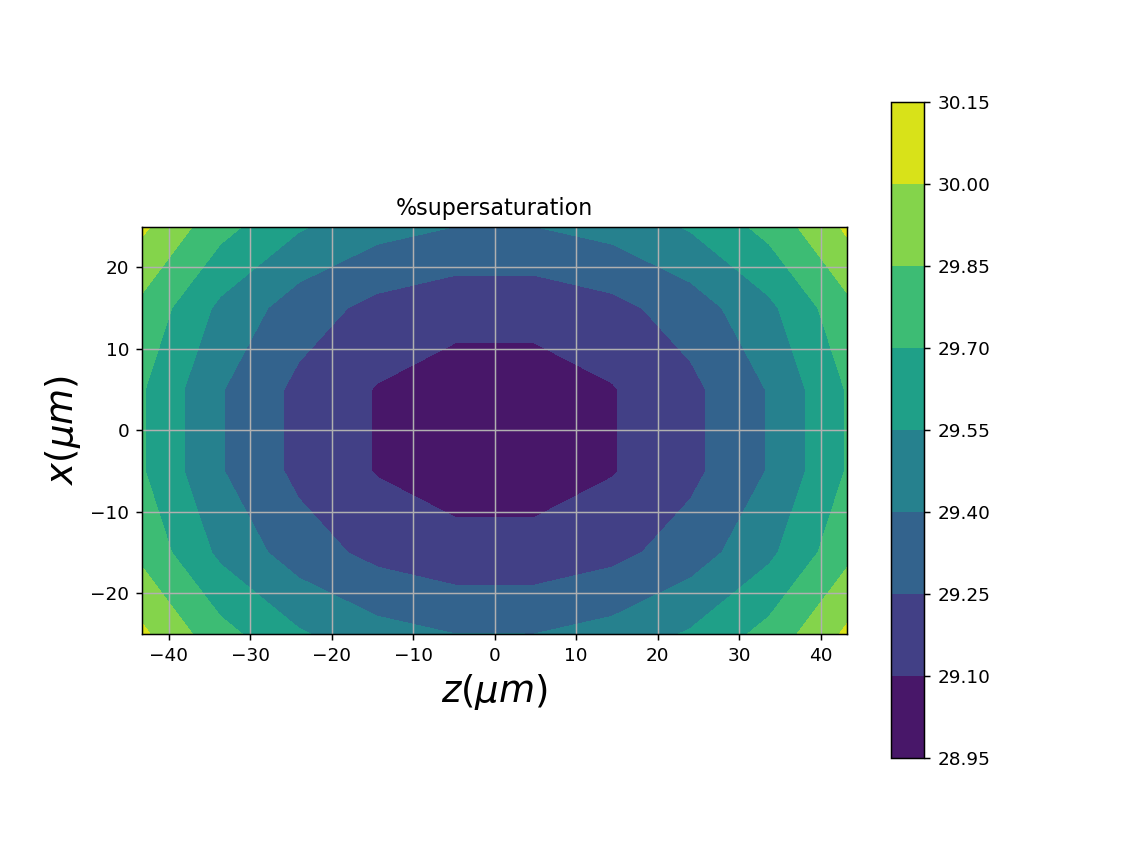

Text(0.5, 1.0, '%supersaturation')

In [16]:
# Graph z-x plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,un[ixbox,iyboxmax,izbox]*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%supersaturation')

In [17]:
# Parameterizing the supersaturation of a surface
def get1dparabolic(X, un_surface_alongX):
    
    # "X" is supposed to be generic (x, y, or z)
    
    # Get the value of un at the edge
    un_surface_alongX_edge = un_surface_alongX[-1]

    # Find the index to the center
    imid = np.round(len(un_surface_alongX)/2).astype(int)

    # Get the value of un at the center
    C0 = un_surface_alongX[imid]
    
    # Get the value of the "X" coordinate at the edge (assumes centered about zero)
    X_edge = X[-1]; #print('X_edge=',X_edge)
    
    # Get the parabolic coefficient
    CX = (un_surface_alongX_edge-C0)/X_edge**2;
    
    return CX, C0

C0z= 0.29033632686824834


<IPython.core.display.Javascript object>


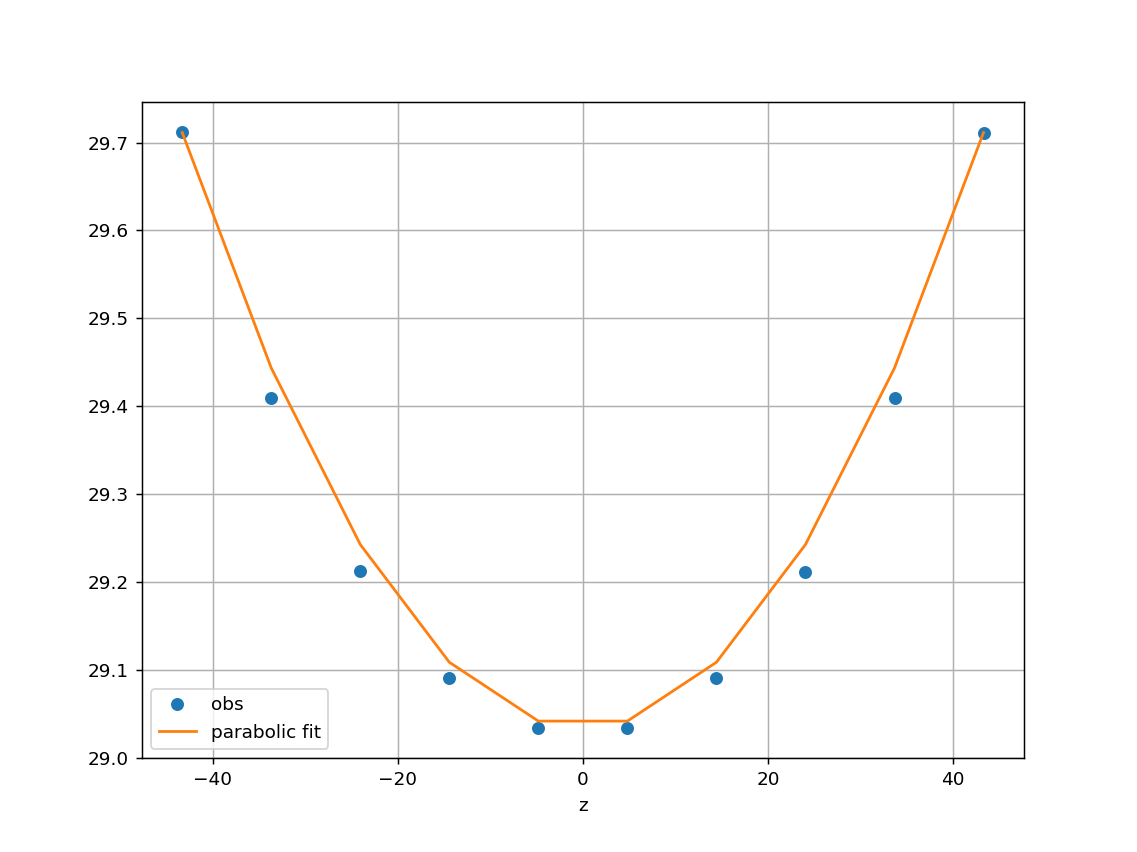

max value in z-direction= 0.2971189886666248
min value in z-direction= 0.29033632686824834
center reduction= 0.006782661798376444
C0x= 0.29033632686824834


<IPython.core.display.Javascript object>


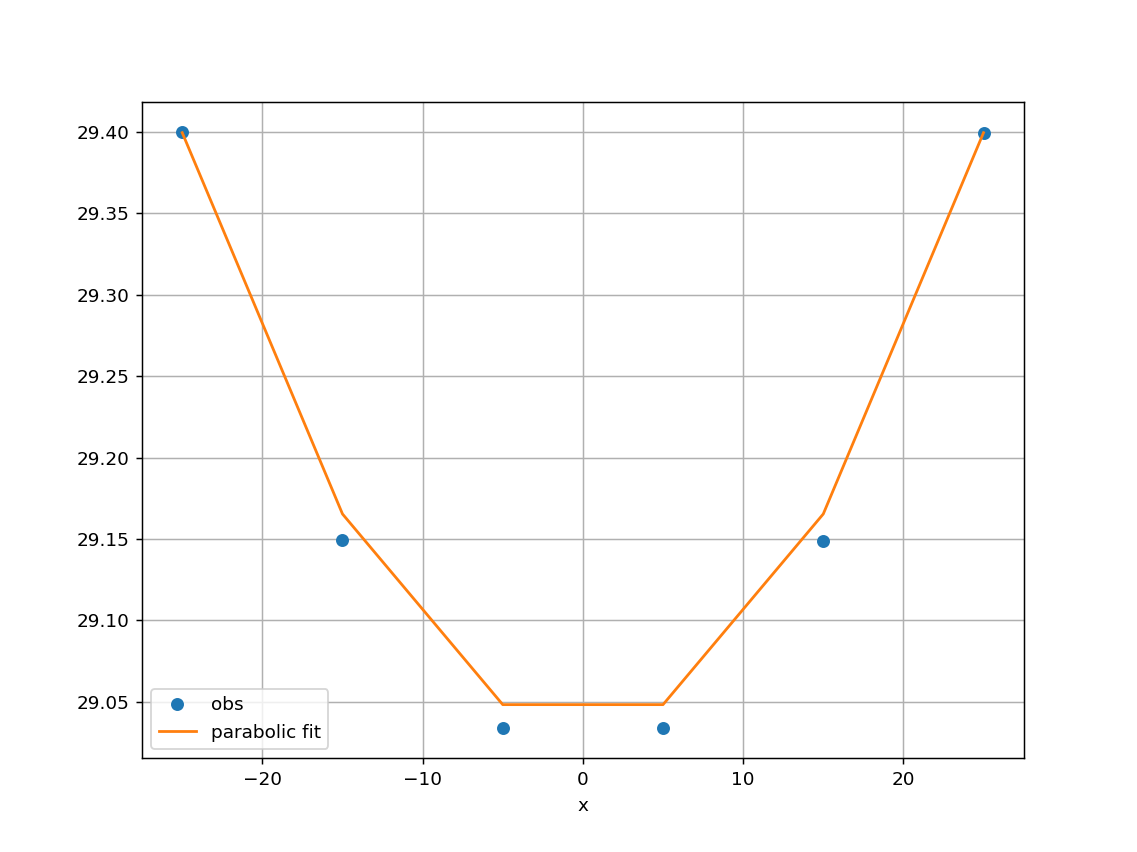

max value in x-direction= 0.29399993825117693


In [18]:
# Testing parabolic parameterizations for the y-surface

# Slicing across the y-surface in the z-direction
un_ysurface_alongz = un[nxmid,iyboxmax,izbox]
Cz,C0z = get1dparabolic(zboxp,un_ysurface_alongz)
print('C0z=',C0z)
un_ysurface_alongz_parabolic = C0z + zboxp**2*Cz
plt.figure()
plt.plot(zboxp,un_ysurface_alongz*100,'o',label='obs')
plt.plot(zboxp,un_ysurface_alongz_parabolic*100,label='parabolic fit')
plt.xlabel('z')
plt.grid(True)
plt.legend()
print('max value in z-direction=',np.max(un_ysurface_alongz))
print('min value in z-direction=',np.min(un_ysurface_alongz))
center_reduction_ysurface_alongz = np.max(un_ysurface_alongz) - np.min(un_ysurface_alongz)
print('center reduction=', center_reduction_ysurface_alongz)

# Slicing across the y-surface in the x-direction
un_ysurface_alongx = un[ixbox,iyboxmax,nzmid]
Cx,C0x = get1dparabolic(xboxp,un_ysurface_alongx)
print('C0x=',C0x)
un_ysurface_alongx_parabolic = C0x + xboxp**2*Cx
plt.figure()
plt.plot(xboxp,un_ysurface_alongx*100,'o',label='obs')
plt.plot(xboxp,un_ysurface_alongx_parabolic*100,label='parabolic fit')
plt.xlabel('x')
plt.grid(True)
plt.legend()
print('max value in x-direction=',np.max(un_ysurface_alongx))

<IPython.core.display.Javascript object>


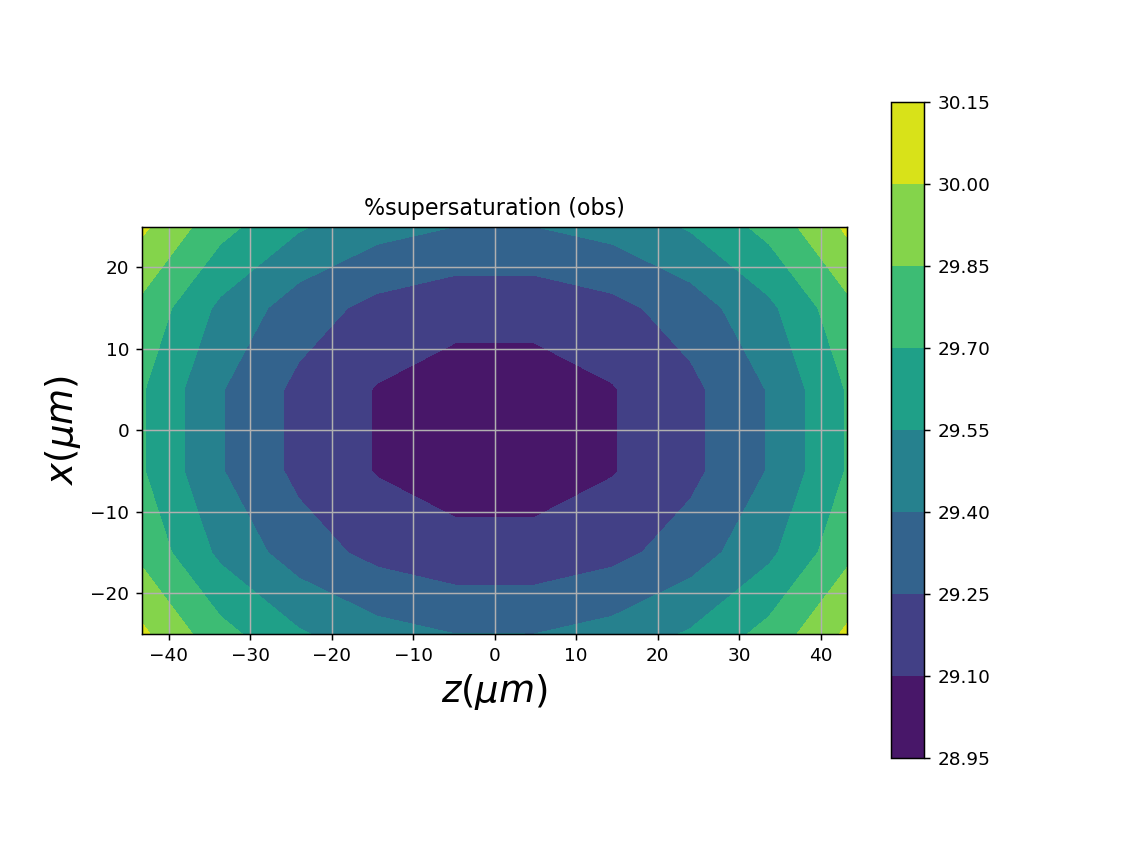

<IPython.core.display.Javascript object>


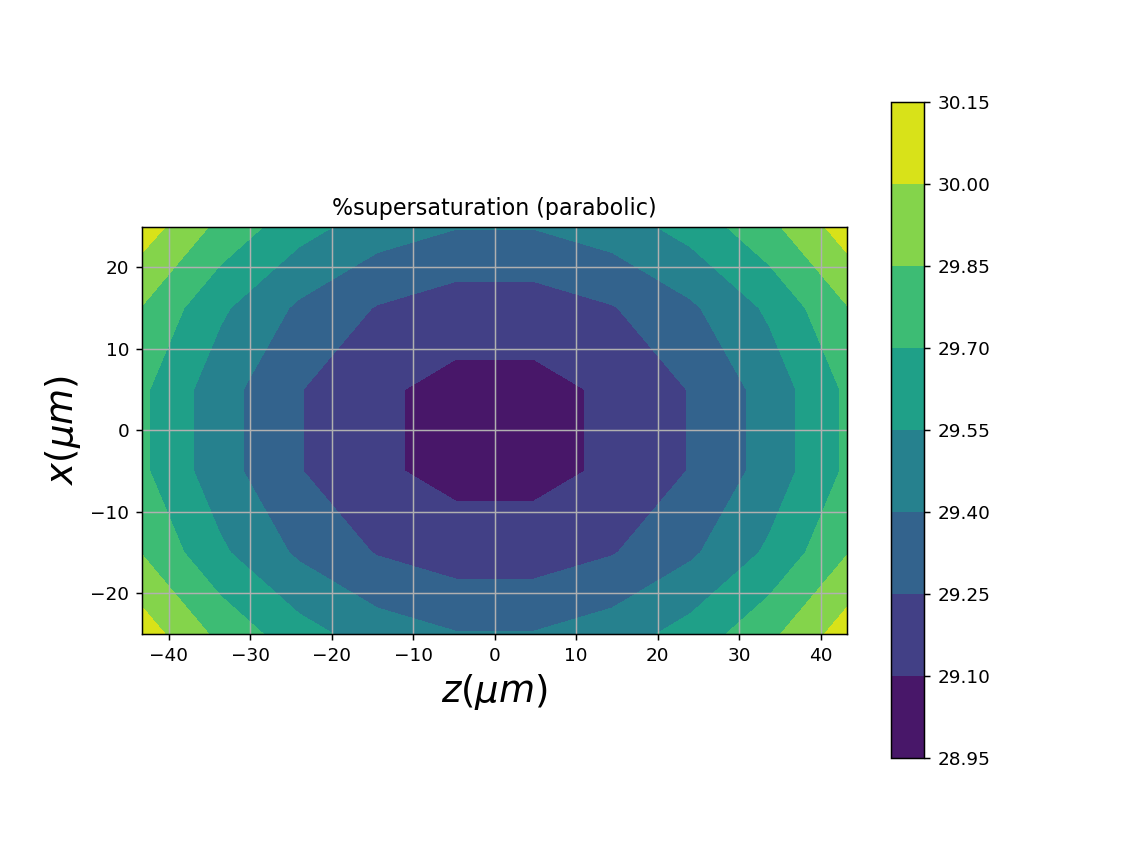

<IPython.core.display.Javascript object>


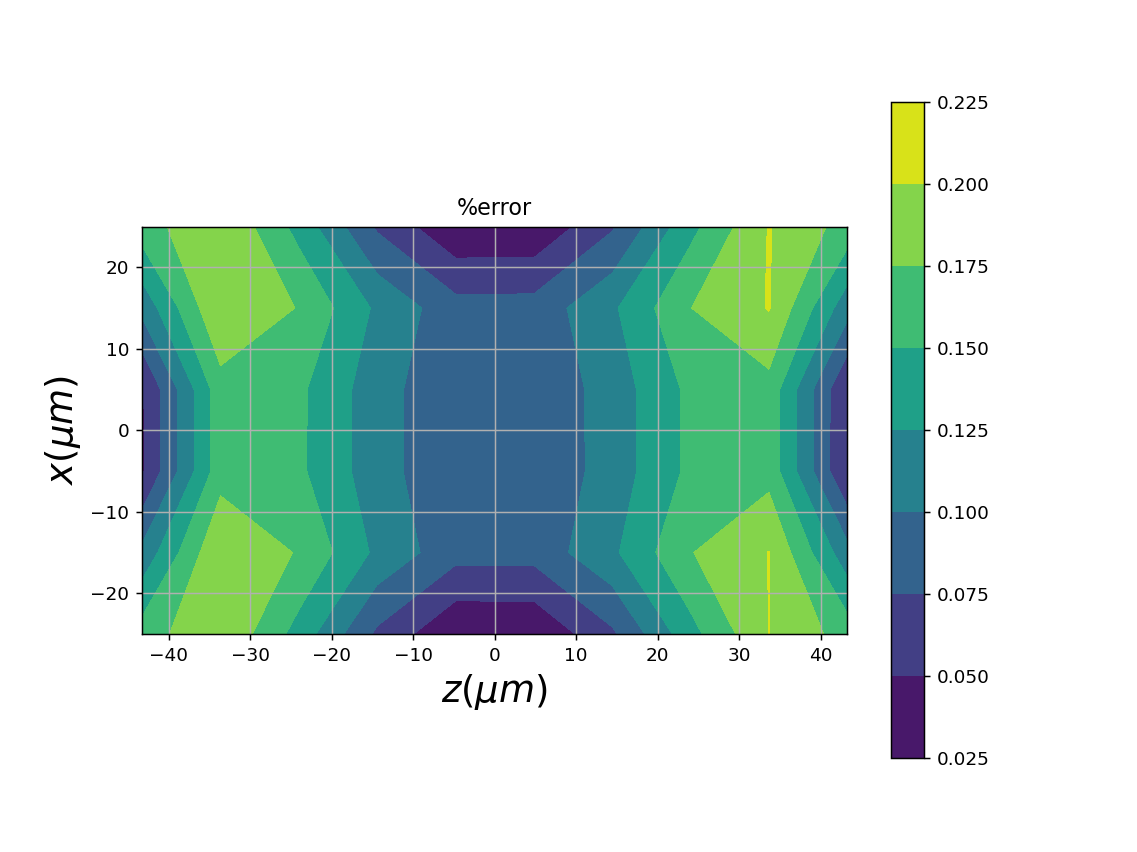

Text(0.5, 1.0, '%error')

In [19]:
# Plotting the original
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,un[ixbox,iyboxmax,izbox]*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%supersaturation (obs)')

# Plotting the 2d parabolic fit
zpbox_grid, xpbox_grid = np.meshgrid(zboxp,xboxp)
un_ysurface_parabolic = C0x + xpbox_grid**2*Cx + zpbox_grid**2*Cz
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,un_ysurface_parabolic*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%supersaturation (parabolic)')

# Plotting the error in the 2d parabolic fit
un_ysurface_parabolic_diff = un_ysurface_parabolic - un[ixbox,iyboxmax,izbox]
un_ysurface_parabolic_error = un_ysurface_parabolic_diff/un[ixbox,iyboxmax,izbox]
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,un_ysurface_parabolic_error*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%error')

In [20]:
def getsigmastep_2d(xs,ys,center_reduction,sigmastepmax): 
    
    # Getting the middle values of "x" and "y"
    xmax = np.max(xs)
    xmin = np.min(xs)
    xmid = (xmax-xmin)/2 +xmin #float64
    
    ymax = np.max(ys)
    ymin = np.min(ys)
    ymid = (ymax-ymin)/2 +ymin #float64
    
    # Decide on an asymmetry factor
    asym = (xmax-xmin)/(ymax-ymin)
    
    # Calculate 2d parabolic coefficients
    C0 = sigmastepmax - center_reduction
    Cx = center_reduction/(xmax-xmid)**2
    Cy = center_reduction/(ymax-ymid)**2/asym
    
    # Make a grid and evaluate supersaturation on it
    xgrid,ygrid = np.meshgrid(xs-xmid,ys-ymid); #print(np.shape(xsgrid))
    return C0 + xgrid**2*Cx + ygrid**2*Cy

In [21]:
# Using getsigmastep_2d 

# Borrowing parameters from the y-surface as a test case
center_reduction = center_reduction_ysurface_alongz
sigmastepmax = np.max(un_ysurface_alongz)

# Call getsigmastep_2d (this is just testing that the algorithm is insensitive to starting x, etc.)
Iwantcentered = False
if Iwantcentered:
    sigmastep = getsigmastep_2d(zboxp,xboxp,center_reduction,sigmastepmax)
else:
    sigmastep = getsigmastep_2d(zboxp-np.min(zboxp),xboxp-np.min(xboxp),center_reduction,sigmastepmax)

<IPython.core.display.Javascript object>


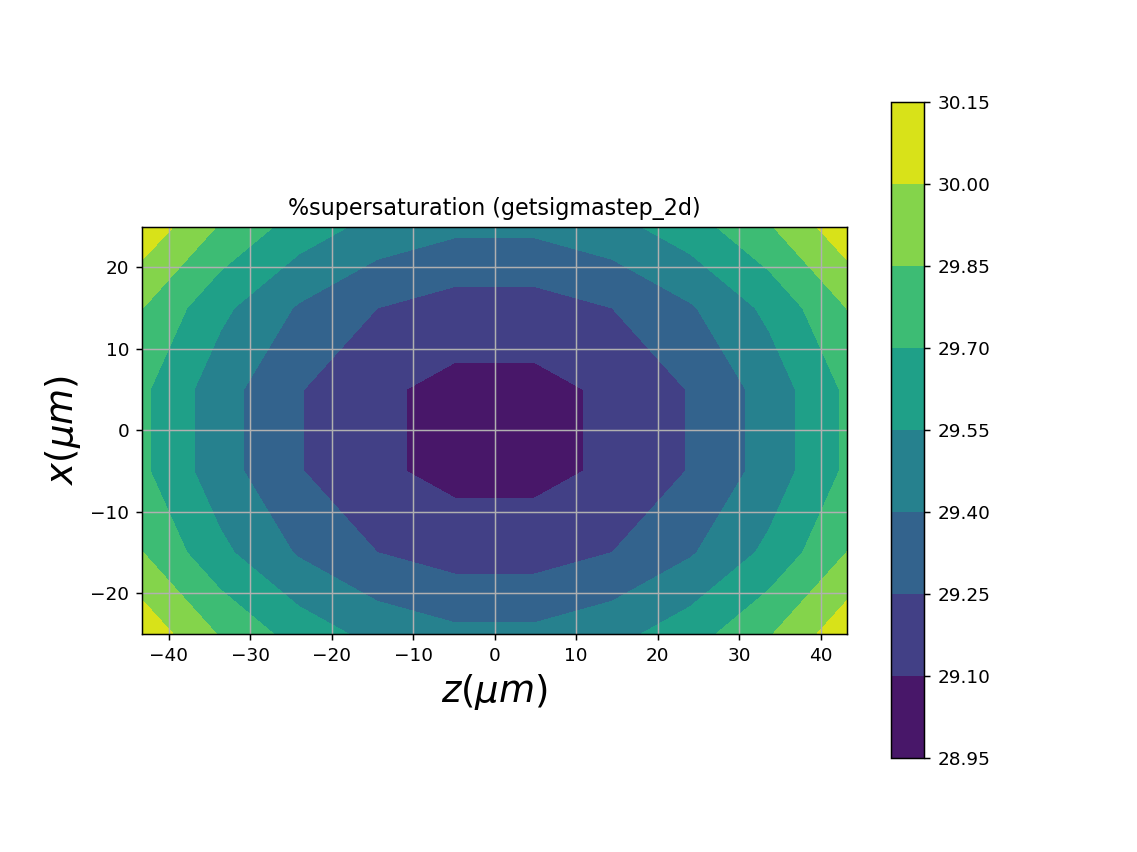

<IPython.core.display.Javascript object>


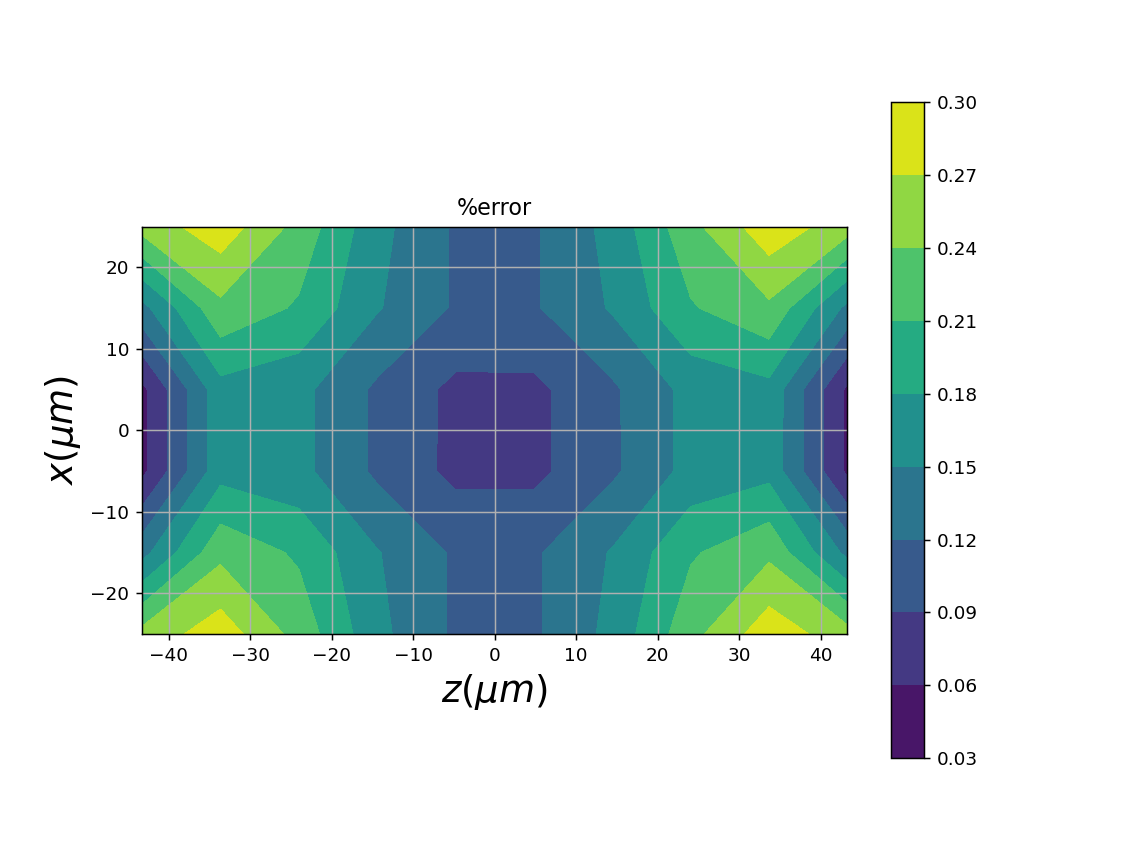

Text(0.5, 1.0, '%error')

In [22]:
# Examine results from getsigmastep_2d as a grid
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,sigmastep*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%supersaturation (getsigmastep_2d)')

# Plot the error in getsigmastep_2d
un_ysurface_sigmastep_diff = sigmastep - un[ixbox,iyboxmax,izbox]
un_ysurface_sigmastep_error = un_ysurface_sigmastep_diff/un[ixbox,iyboxmax,izbox]
fig,ax = plt.subplots()
CS = ax.contourf(zboxp,xboxp,un_ysurface_sigmastep_error*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
fig.colorbar(CS)
plt.title('%error')

5
3


<IPython.core.display.Javascript object>


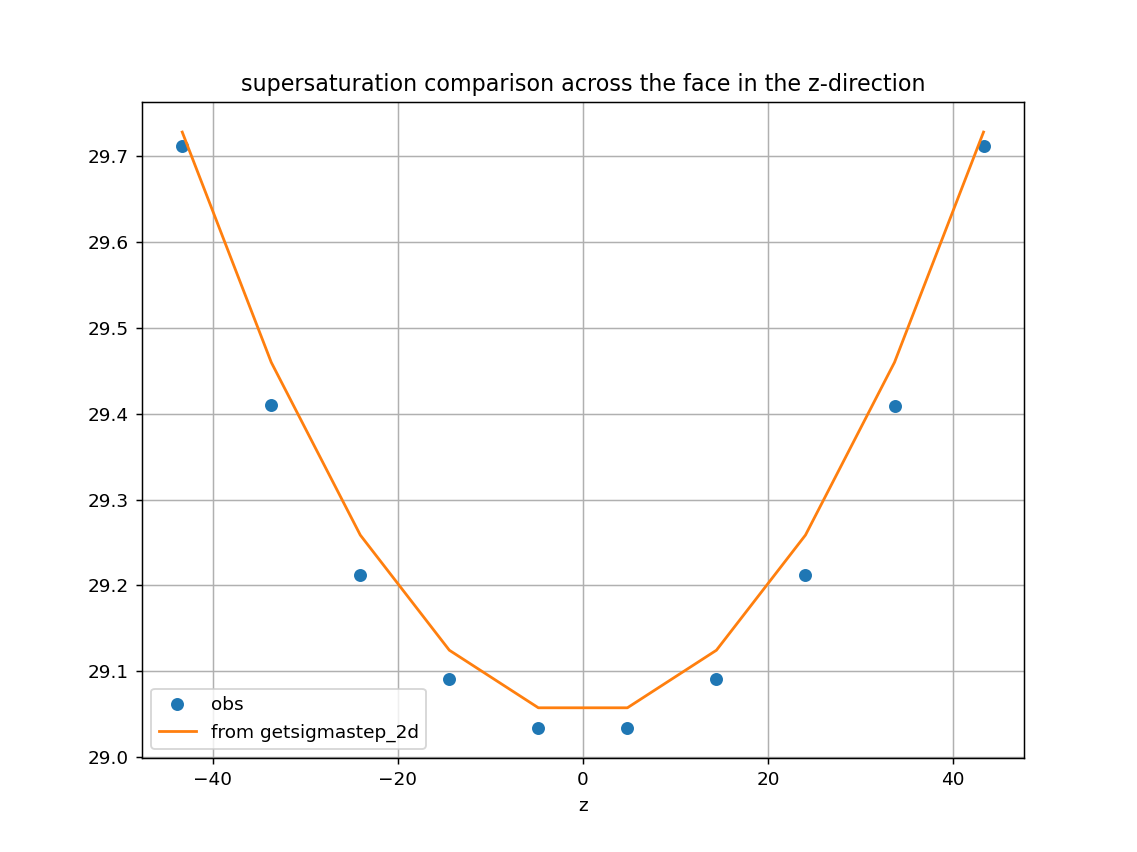

<IPython.core.display.Javascript object>


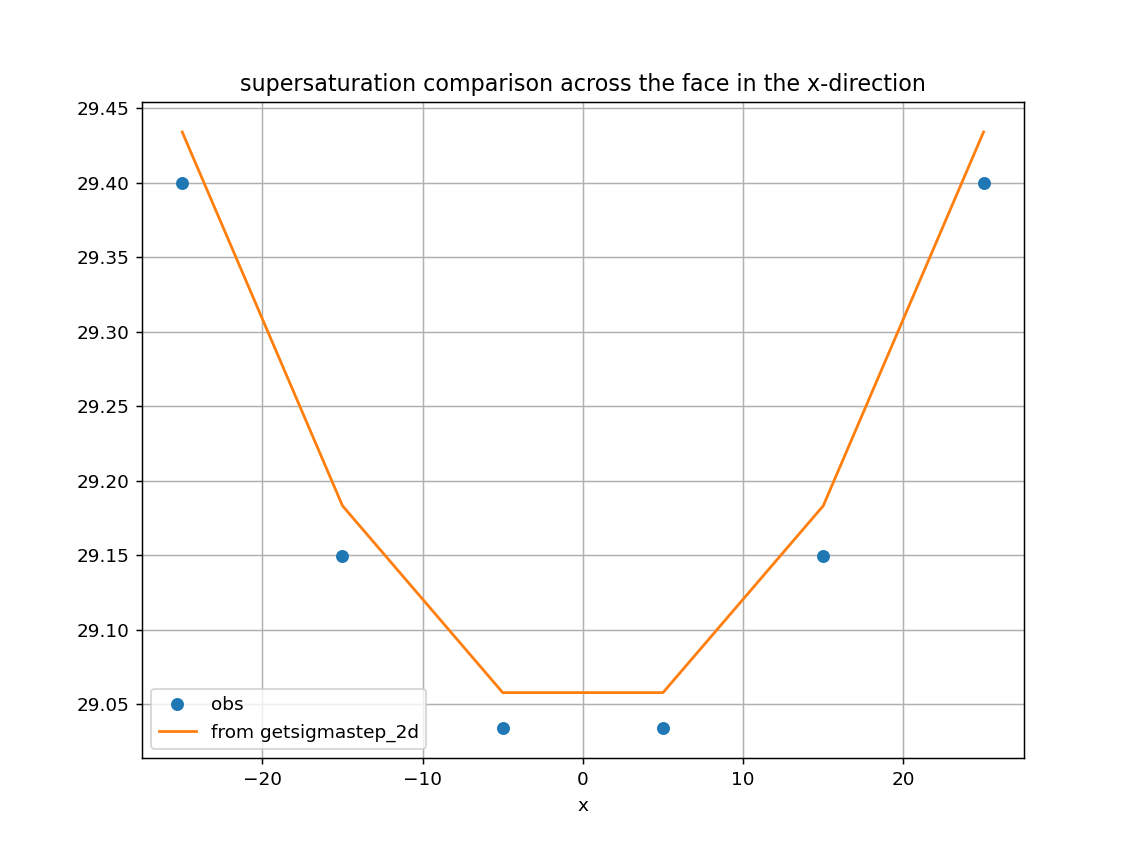

Text(0.5, 1.0, 'supersaturation comparison across the face in the x-direction')

In [23]:
# Testing getsigmastep_2d slices for the y-surface

# Get the dimensions and midpoints of sigmastep
nx_getsigmastep_2d, nz_getsigmastep_2d = np.shape(sigmastep)
midz_getsigmastep_2d = np.round(nz_getsigmastep_2d/2).astype(int); print(midz_getsigmastep_2d)
midx_getsigmastep_2d = np.round(nx_getsigmastep_2d/2).astype(int); print(midx_getsigmastep_2d)

# Slice across the y-surface along the z-direction and the x-direction
un_ysurface_alongz_getsigmastep_2d = sigmastep[midx_getsigmastep_2d,:]
un_ysurface_alongx_getsigmastep_2d = sigmastep[:,midz_getsigmastep_2d]

# Let's see what these look like
plt.figure()
plt.plot(zboxp,un_ysurface_alongz*100,'o',label='obs')
plt.plot(zboxp,un_ysurface_alongz_getsigmastep_2d*100,label='from getsigmastep_2d')
# plt.plot(zboxp,(un_ysurface_alongz_getsigmastep_2d-un_ysurface_alongz)*100,label='difference')
plt.xlabel('z')
plt.grid(True)
plt.legend()
plt.title('supersaturation comparison across the face in the z-direction')

plt.figure()
plt.plot(xboxp,un_ysurface_alongx*100,'o',label='obs')
plt.plot(xboxp,un_ysurface_alongx_getsigmastep_2d*100,label='from getsigmastep_2d')
# plt.plot(xboxp,(un_ysurface_alongx_getsigmastep_2d-un_ysurface_alongx)*100,label='error')
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.title('supersaturation comparison across the face in the x-direction')